In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alfa, m, N = 1.0, 1.0, 50  # N+1 - liczba atomów
dt, dx = 0.02, 0.1
n = 5000  # liczba kroków czasowych
sigma = 3*dx
t_max = n*dt
x_max = N*dx
t_vec = np.linspace(0.0, t_max, n+1)
x_vec = np.linspace(0, N, N+1)
s = np.zeros(2*N+2)

In [3]:
def RK4_vec(t, dt, n, s, func):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    w = np.zeros(n)
    for i in range(n):
        w[i] = s[i]
    func(t, w, k1)
    for i in range(n):
        w[i] = s[i] + dt/2 * k1[i]
    func(t + dt/2, w, k2)
    for i in range(n):
        w[i] = s[i] + dt/2 * k2[i]
    func(t + dt/2, w, k3)
    for i in range(n):
        w[i] = s[i] + dt * k3[i]
    func(t + dt, w, k4)
    for i in range(n):
        s[i] += dt/6 * (k1[i] + 2*k2[i] + 2*k3[i] + k4[i])


def derivatives(t: float, s: np.array, k: np.array) -> None:
    alfa, m, N = 1.0, 1.0, 50

    for i in range(1, N):
        k[i] = s[i+N+1]  # x
        k[i+N+1] = (alfa/m)*(s[i-1] - 2*s[i] + s[i+1])  # v

    k[0] = 0
    k[N] = 0
    k[N+1] = 0
    k[2*N+1] = 0

In [4]:
def init_cond():  # war. początkowy
    for i in range(1, N+1):
        s[i] = i*dx + (dx/3)*np.exp(-((i*dx - 0.5*x_max)**2)/(2*sigma**2))


x, v, T, U = np.zeros((N+1, n+1)), np.zeros((N+1, n+1)), np.zeros(n+1), np.zeros(n+1)
x_temp = np.copy(x)  # tablica do wychyleń cząstek
i, t = 0, 0
init_cond()


In [5]:
while i <= n:
    RK4_vec(t, dt, 2*N+2, s, derivatives)
    t += dt

    for j in range(N+1):
        x[j][i] = s[j]
        v[j][i] = s[j+N+1]
        x_temp[j][i] = x[j][i] - dx*j

    for k in range(N+1):
        T[i] += 0.5*m*(v[k][i])**2
    i += 1

In [6]:
i = 0
while i <= n:
    for k in range(1, N+1):
        U[i] += 0.5*alfa*(x[k-1][i] - x[k][i] + dx)**2
    i += 1

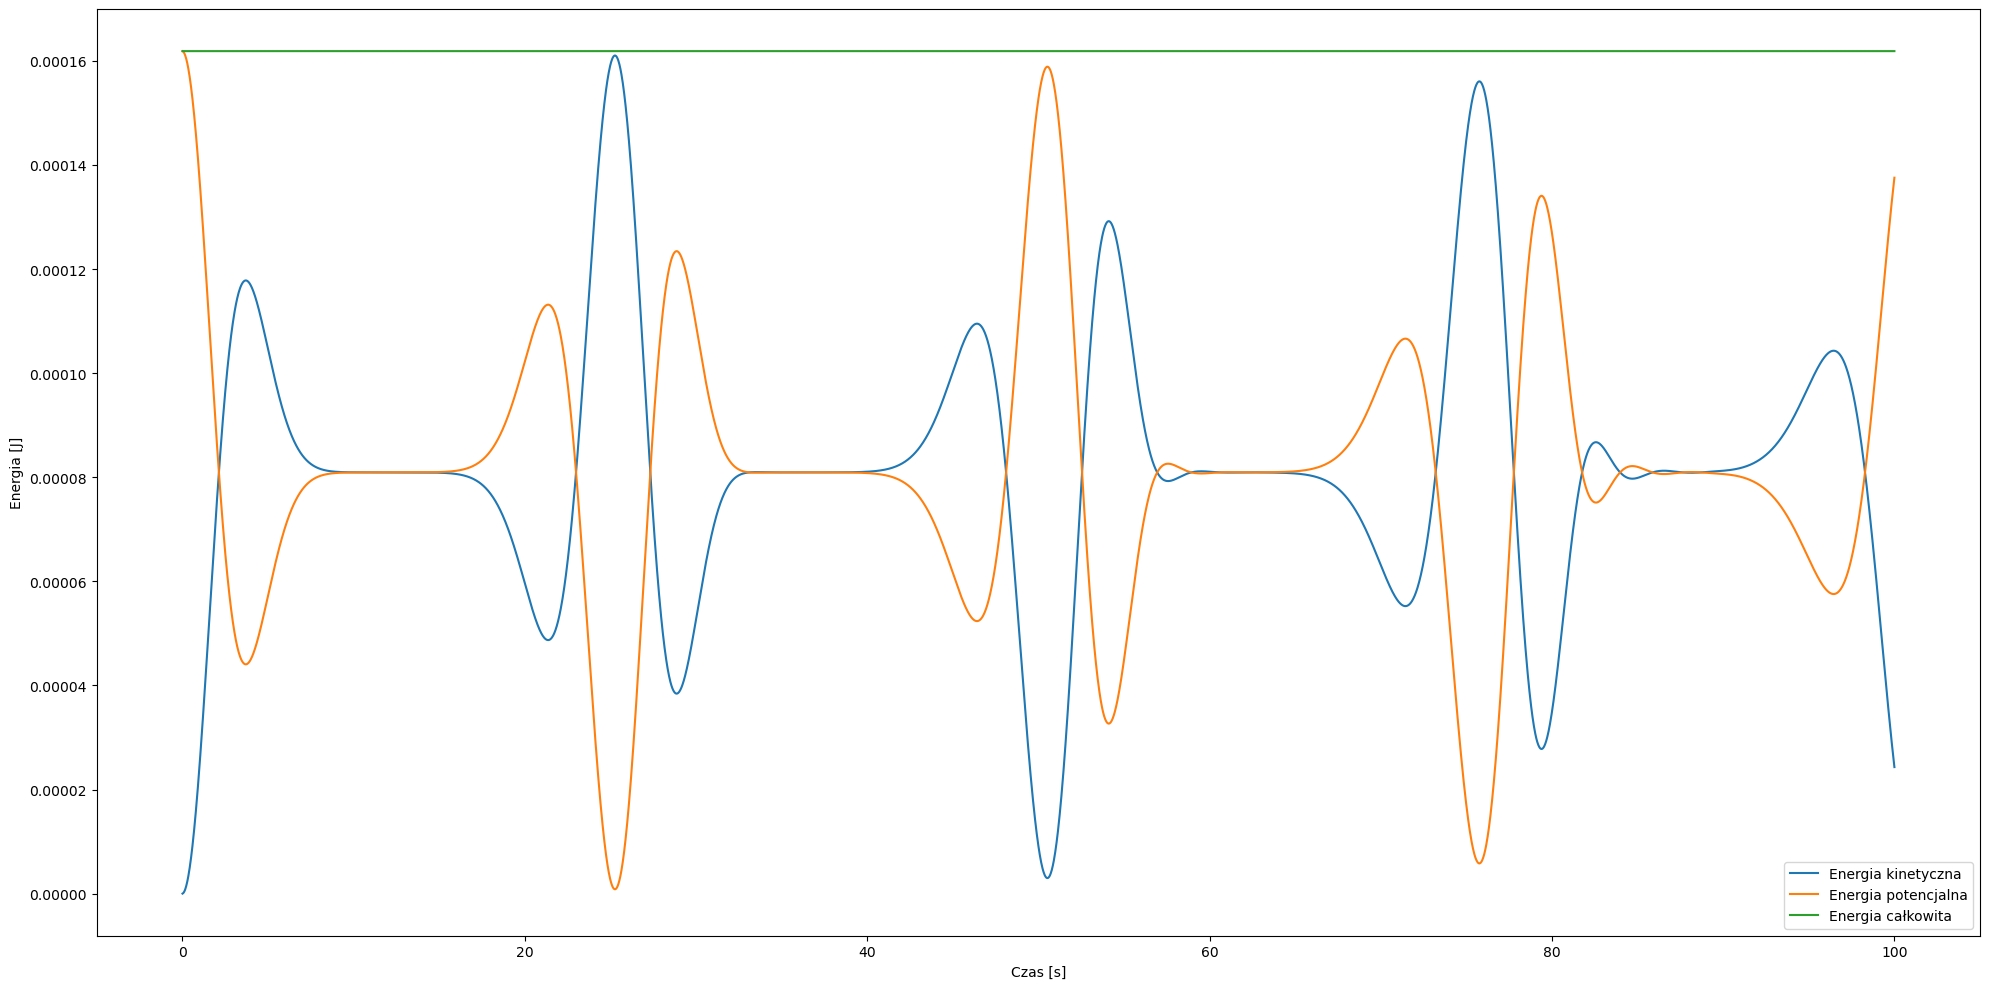

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(t_vec, T, label="Energia kinetyczna")
plt.plot(t_vec, U, label="Energia potencjalna")
plt.plot(t_vec, T+U, label="Energia całkowita")
plt.xlabel('Czas [s]')
plt.ylabel('Energia [J]')
plt.legend()
plt.tight_layout()
plt.show()

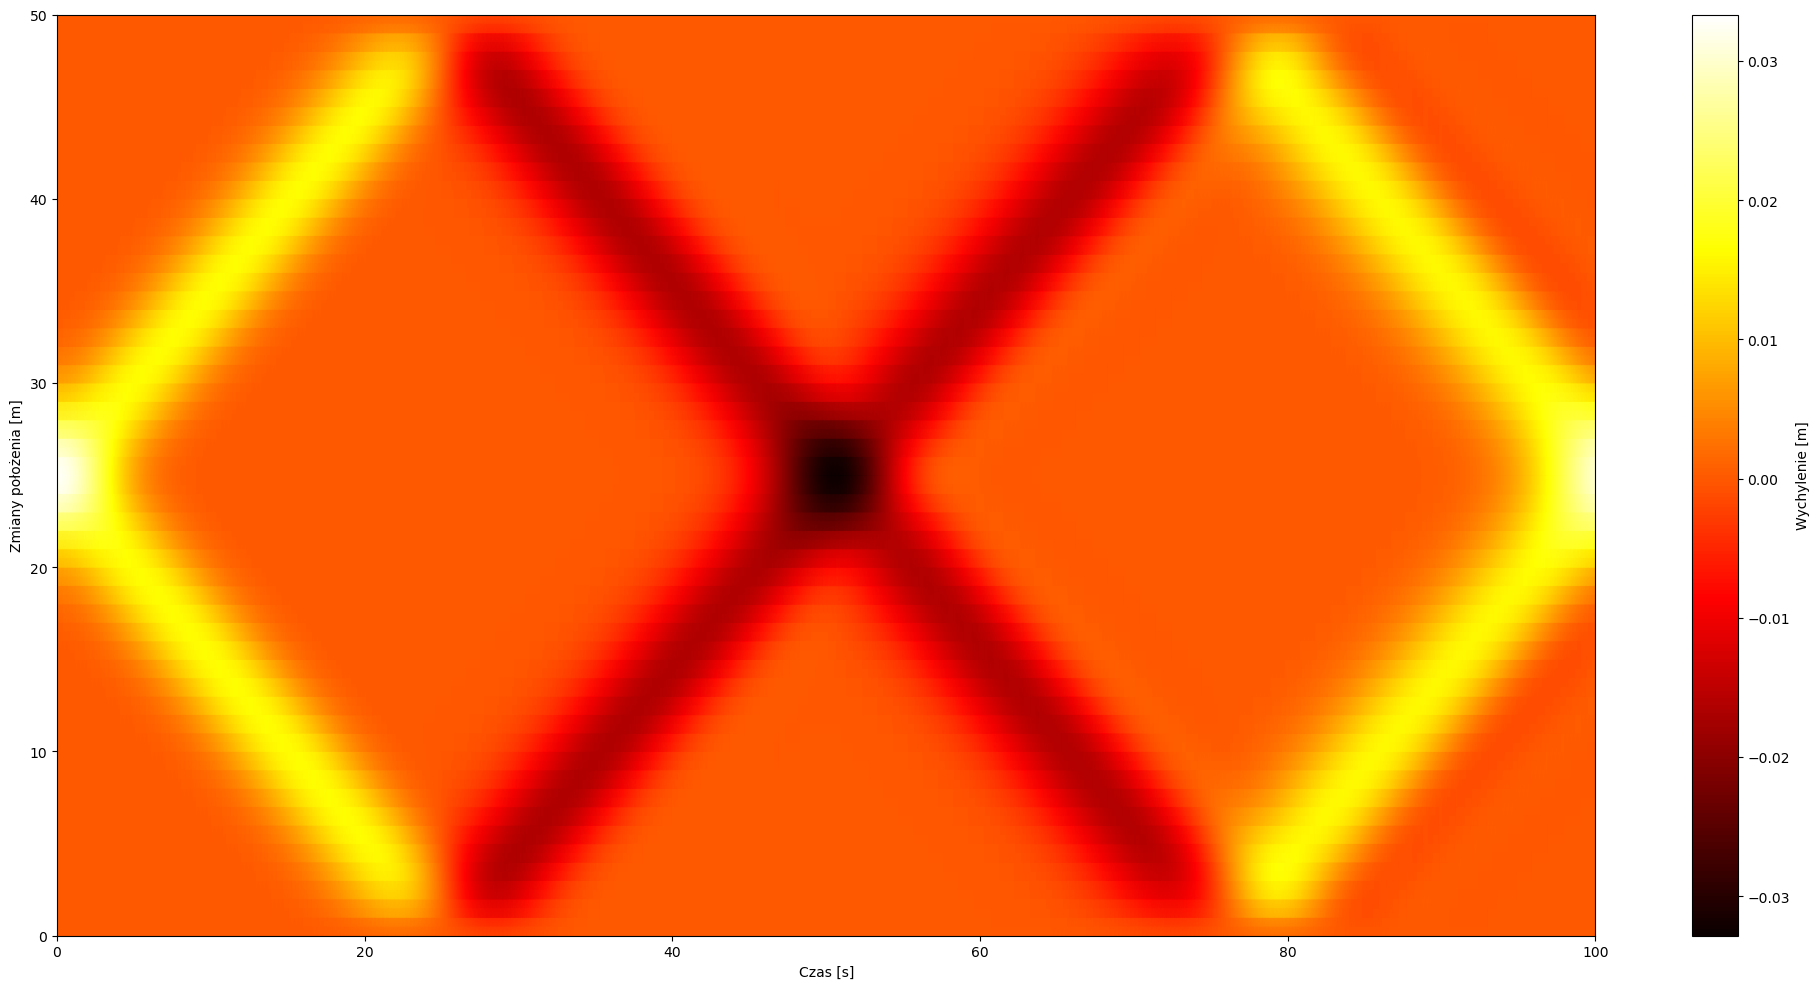

In [8]:
plt.figure(figsize=(20, 10))
plt.pcolormesh(t_vec, x_vec, x_temp, shading='gouraud',cmap='hot')
cbar = plt.colorbar()
cbar.set_label('Wychylenie [m]')
plt.xlabel('Czas [s]')
plt.ylabel('Zmiany położenia [m]')
plt.tight_layout()
plt.show()

In [69]:
alfa, m, N = 1.0, 1.0, 50  # N+1 - liczba atomów
dt, dx = 0.02, 0.1
sigma = 3*dx
x_max = N*dx
x_vec = np.linspace(0, N, N+1)
s = np.zeros(2*N+2)


#nn = [0.9, 1.0, 1.1, 1.5, 2.0, 5.0]
'''
n1 = 0.9
n2 = 1.0
n3 = 1.1
n4 = 1.5
n5 = 2.0
n6 = 5.0
'''
omega_n = [ 2*np.sqrt(alfa/m)*abs(np.sin(np.pi*nn[i]/(2*N))) for i in range(len(nn)) ]
'''
omega_n1 = 2*np.sqrt(alfa/m) * abs(np.sin(np.pi*n1/(2*N)))
omega_n2 = 2*np.sqrt(alfa/m) * abs(np.sin(np.pi*n2/(2*N)))
omega_n3 = 2*np.sqrt(alfa/m) * abs(np.sin(np.pi*n3/(2*N)))
omega_n4 = 2*np.sqrt(alfa/m) * abs(np.sin(np.pi*n4/(2*N)))
omega_n5 = 2*np.sqrt(alfa/m) * abs(np.sin(np.pi*n5/(2*N)))
omega_n6 = 2*np.sqrt(alfa/m) * abs(np.sin(np.pi*n6/(2*N)))
'''
t_max = [40*np.pi/(omega_n[i]) for i in range(len(omega_n))]
'''
t_max1 = 40*np.pi/(omega_n1)
t_max2 = 40*np.pi/(omega_n2)
t_max3 = 40*np.pi/(omega_n3)
t_max4 = 40*np.pi/(omega_n4)
t_max5 = 40*np.pi/(omega_n5)
t_max6 = 40*np.pi/(omega_n6)
'''
n = [int(t_max[i]/dt) for i in range(len(t_max))]  # czas
'''
time1 = int(t_max1/dt)
time2 = int(t_max2/dt)
time3 = int(t_max3/dt)
time4 = int(t_max4/dt)
time5 = int(t_max5/dt)
time6 = int(t_max6/dt)
'''
t_vec = np.linspace(0.0, t_max[5], n[5]+1)

x, v, T, U = np.zeros((N+1, n[5]+1)), np.zeros((N+1, n[5]+1)), np.zeros(n[5]+1), np.zeros(n[5]+1)
x_temp = np.copy(x) # tablica do wychyleń cząstek

In [70]:
def init_cond_res(): # war. początkowy
    for i in range(1, N+1):
        s[i] = i*dx

def derivatives_res(t: float, s: np.array, k: np.array) -> None:
    alfa, m, N, F = 1.0, 1.0, 50, 0.01

    for i in range(1, N):
        k[i] = s[i+N+1]  # x
        k[i+N+1] = (alfa/m)*(s[i-1] - 2*s[i] + s[i+1])  # v
    
    k[0] = 0
    k[N] = 0
    k[N+1] = 0
    k[2*N+1] = 0
    k[N+2] = (alfa/m)*(s[0] - 2*s[1] + s[2]) + (F/m)*np.sin(omega_n[5]*t)

In [71]:
i, t = 0, 0
init_cond_res()
while i <= n[5]:
    RK4_vec(t, dt, 2*N+2, s, derivatives_res)
    t += dt

    for j in range(N+1):
        x[j][i] = s[j]
        v[j][i] = s[j+N+1]
        x_temp[j][i] = x[j][i] - dx*j
    i += 1

i = 0
while i <= n[5]:
    for k in range(N+1):
        T[i] += 0.5*m*(v[k][i])**2
    i += 1

i = 0
while i <= n[5]:
    for k in range(1, N+1):
        U[i] += 0.5*alfa*( x[k-1][i] - x[k][i] + dx )**2
    i += 1

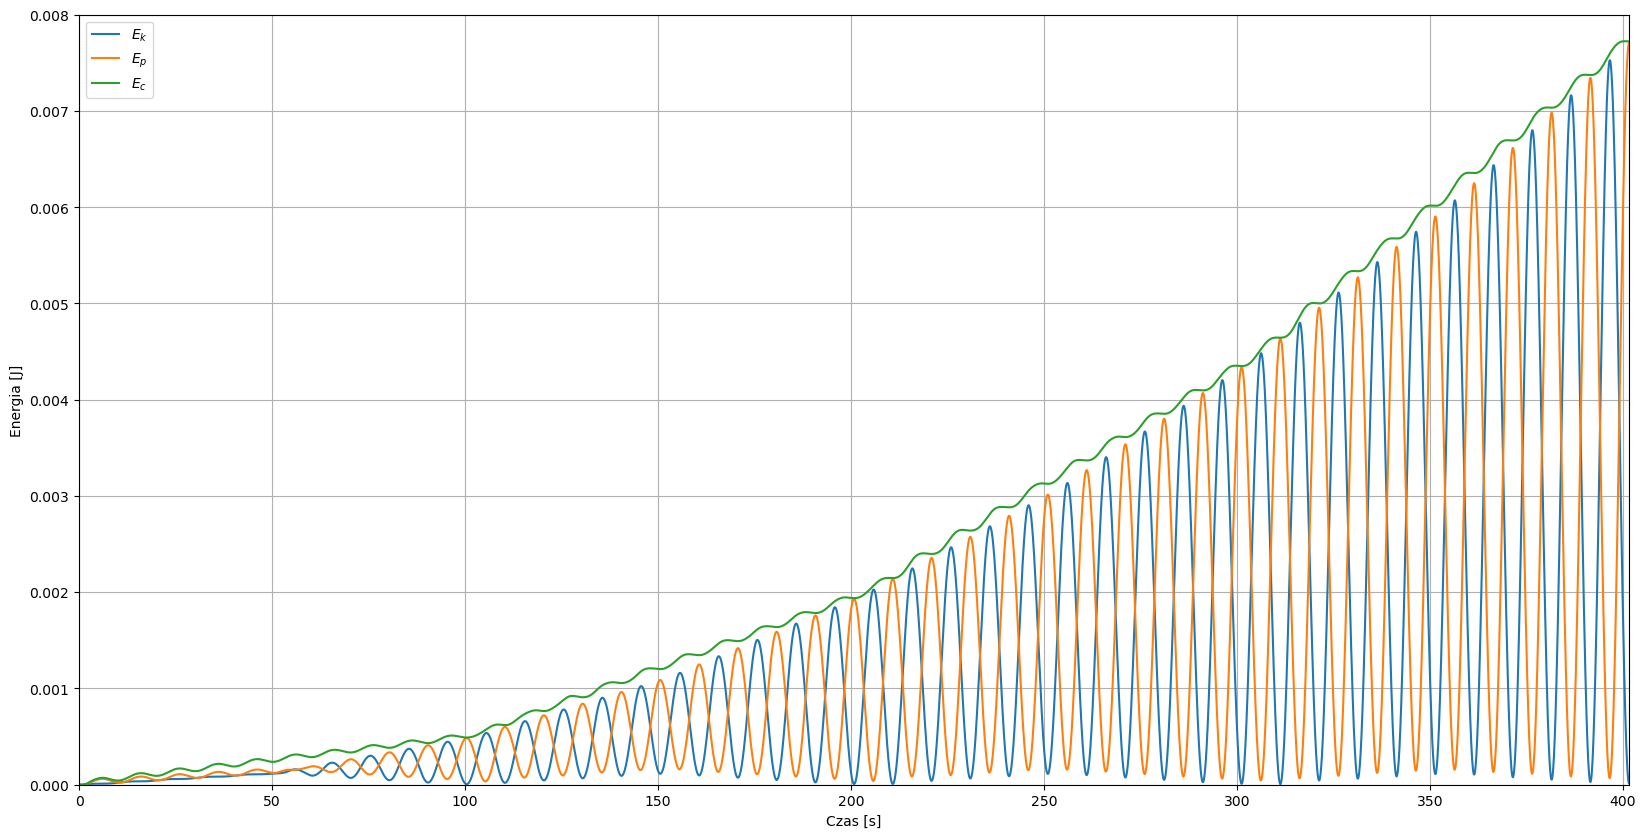

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(t_vec, T)
plt.plot(t_vec, U)
plt.plot(t_vec, T+U)
plt.grid()
plt.xlim(0.0, t_max[5])
plt.ylim(0.0, 0.008)
plt.xlabel('Czas [s]')
plt.ylabel('Energia [J]')
plt.legend([r'$E_{k}$', r'$E_{p}$', r'$E_{c}$'], loc=0)
plt.show()

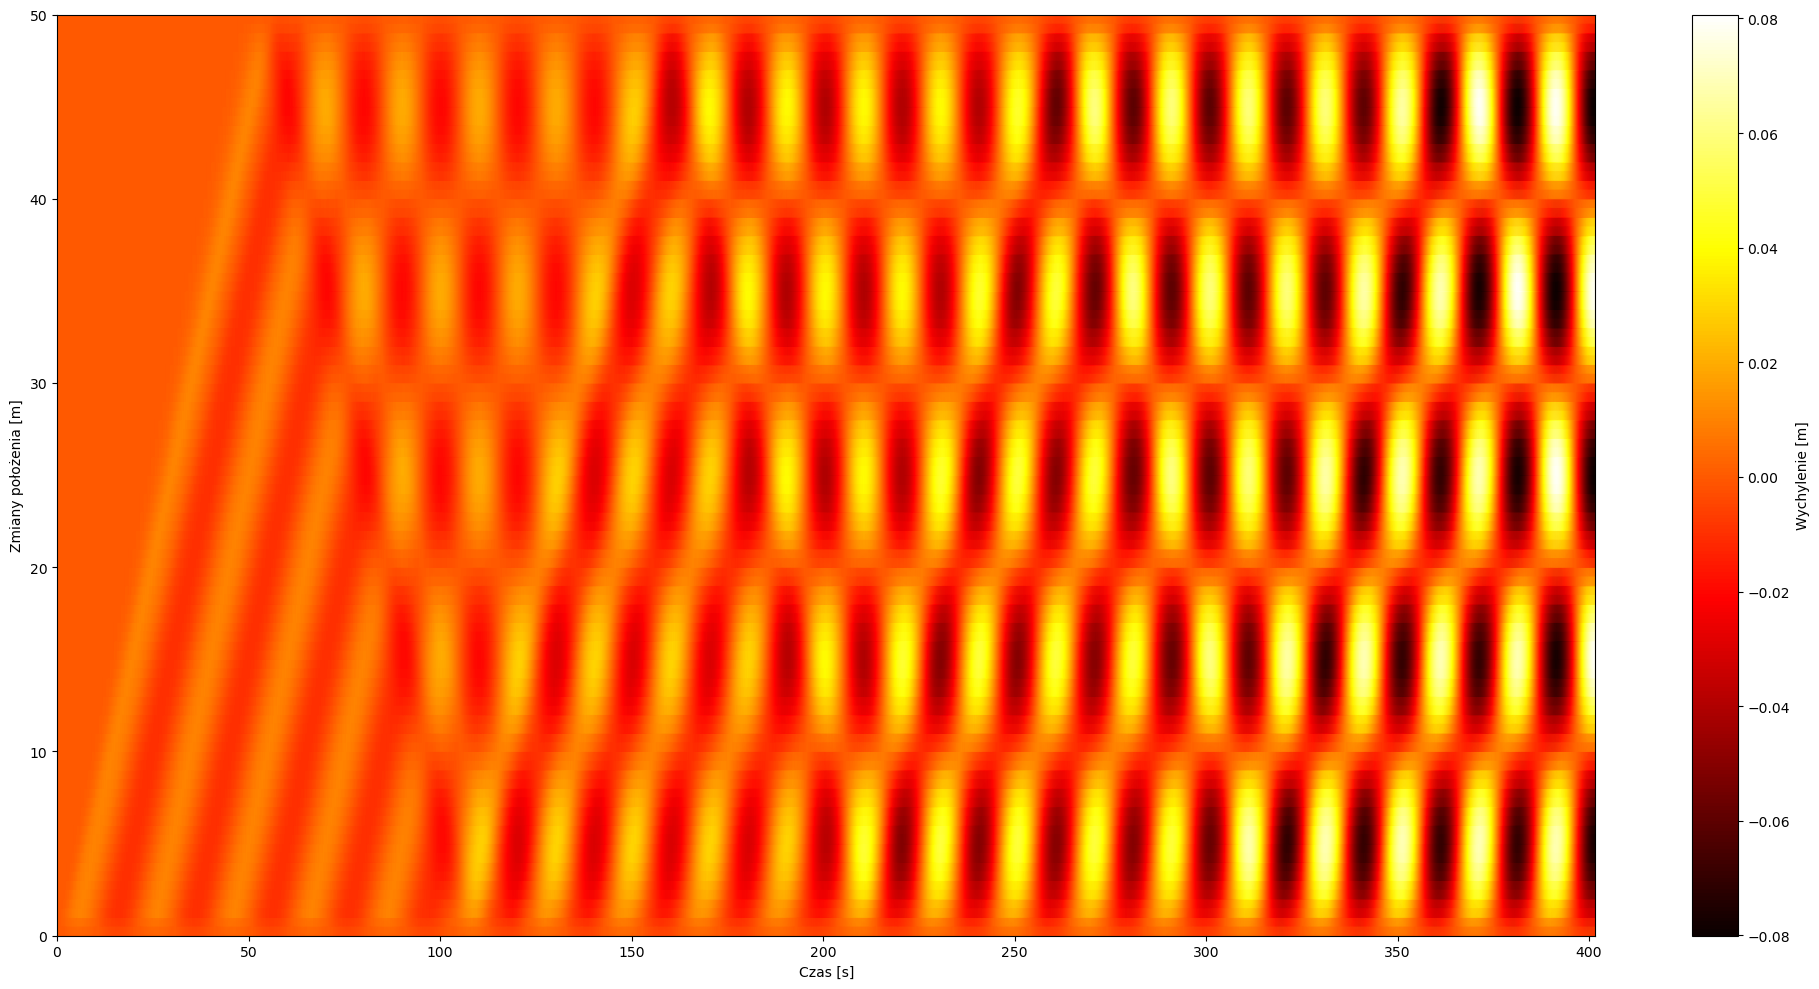

In [73]:
plt.figure(figsize=(20, 10))
plt.pcolormesh(t_vec, x_vec, x_temp, shading='gouraud',cmap='hot')
cbar = plt.colorbar()
cbar.set_label('Wychylenie [m]')
plt.xlim(0.0, t_max[5])
plt.xlabel('Czas [s]')
plt.ylabel('Zmiany położenia [m]')
plt.tight_layout()
plt.show()